<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_4/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ORIGINAL IMAGE


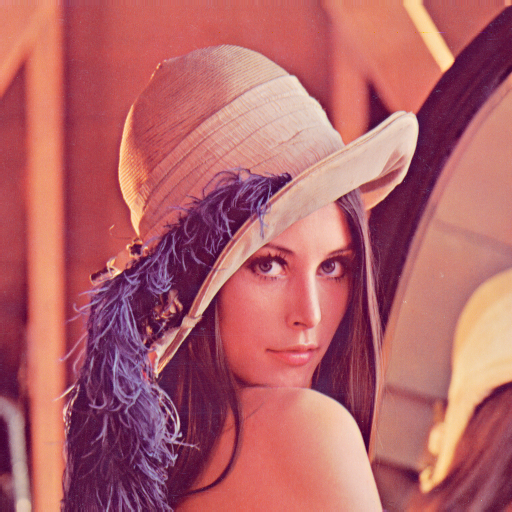

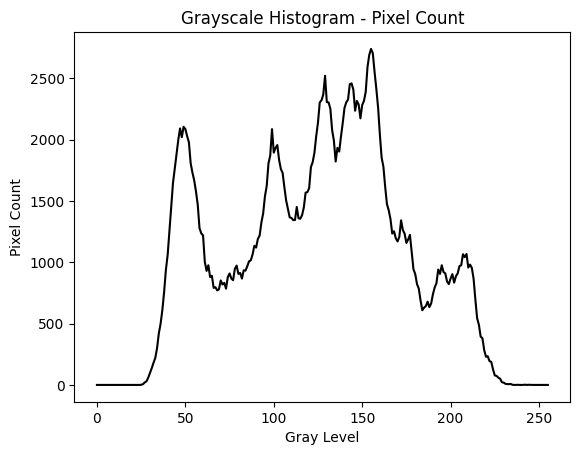

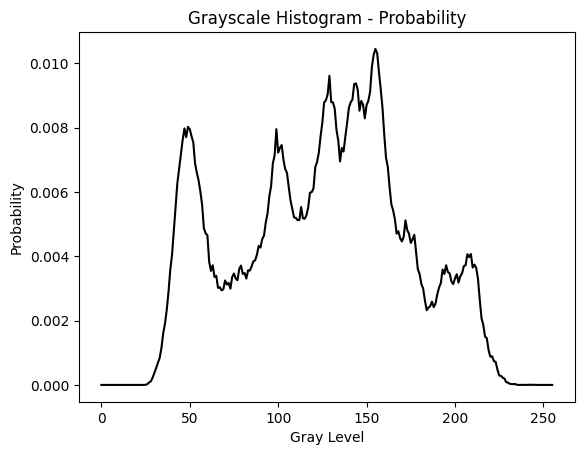

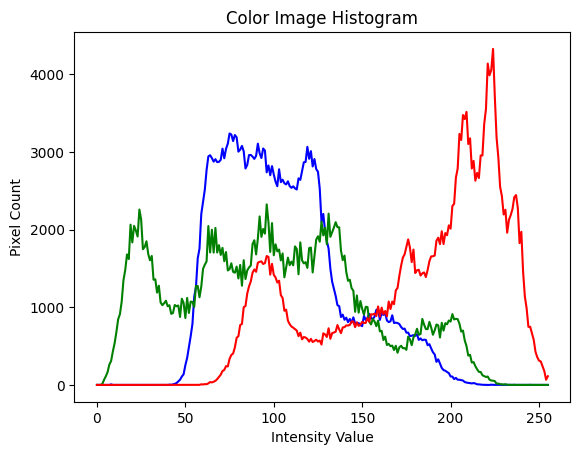

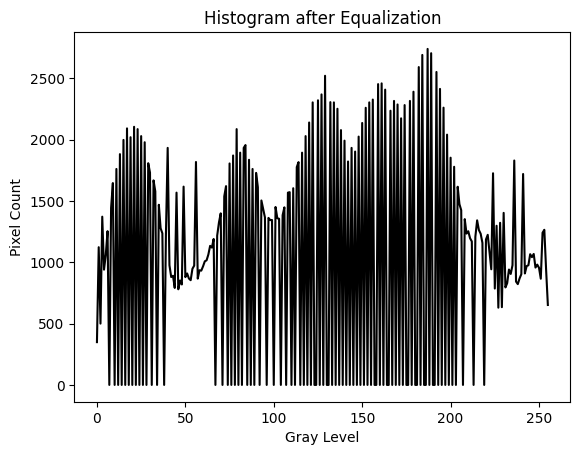



GRAYSCALE IMAGE


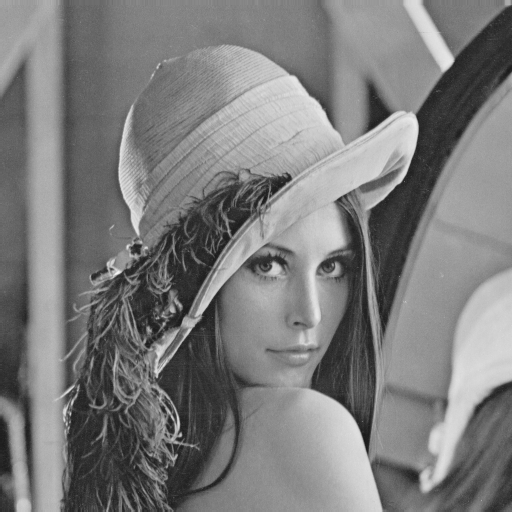



EQUALIZED IMAGE


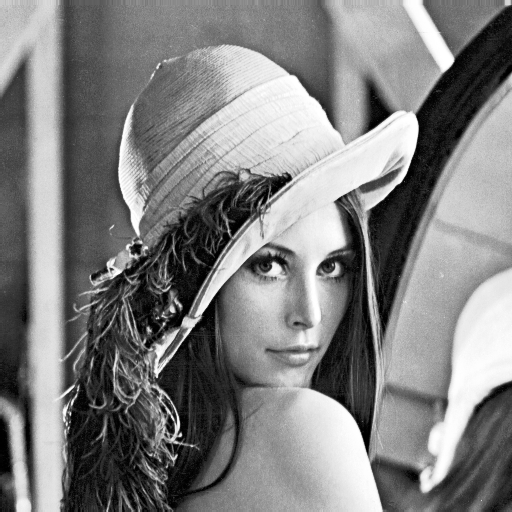

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def plot_histogram(image, title, mode='count'):
    print('\n\n')
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    if mode == 'prob':
        hist /= hist.sum()
        ylabel = 'Probability'
    else:
        ylabel = 'Pixel Count'

    plt.figure()
    plt.plot(hist, color='black')
    plt.xlabel('Gray Level')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def plot_color_histogram(image, title):
    print('\n\n')
    colors = ('blue', 'green', 'red')
    plt.figure()
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.title(title)
    plt.show()

def histogram_equalization(image):
    """
    Enhances contrast using histogram equalization.
    """
    return cv2.equalizeHist(image)

# Load the image
image_path = '/content/Lena_Image.png'
image = cv2.imread(image_path)

print("ORIGINAL IMAGE")
cv2_imshow(image)

if image is None:
    print("Error: Could not read the image.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute and plot histograms
    plot_histogram(gray_image, 'Grayscale Histogram - Pixel Count')
    plot_histogram(gray_image, 'Grayscale Histogram - Probability', mode='prob')
    plot_color_histogram(image, 'Color Image Histogram')

    # Histogram Equalization
    equalized_image = histogram_equalization(gray_image)
    plot_histogram(equalized_image, 'Histogram after Equalization')

    # Display original and equalized grayscale images in Colab
    print("\n\nGRAYSCALE IMAGE")
    cv2_imshow(gray_image)
    print("\n\nEQUALIZED IMAGE")
    cv2_imshow(equalized_image)

ORIGINAL IMAGE


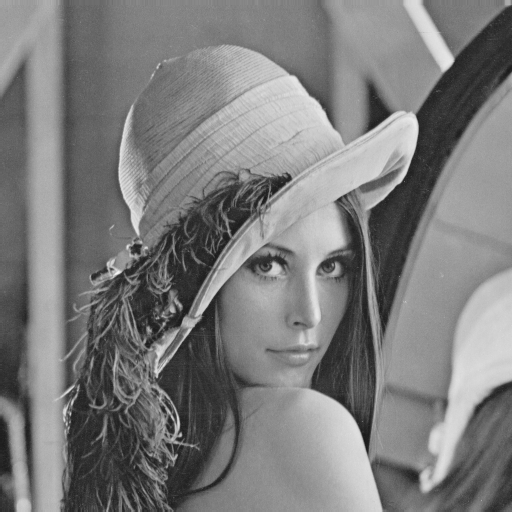



RECONSTRUCTED IMAGE


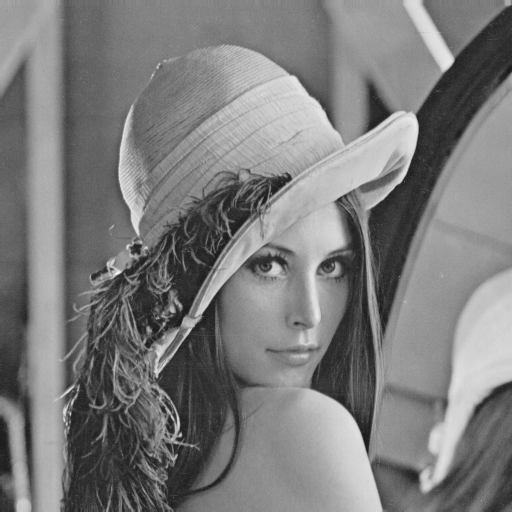



ROTATED IMAGE


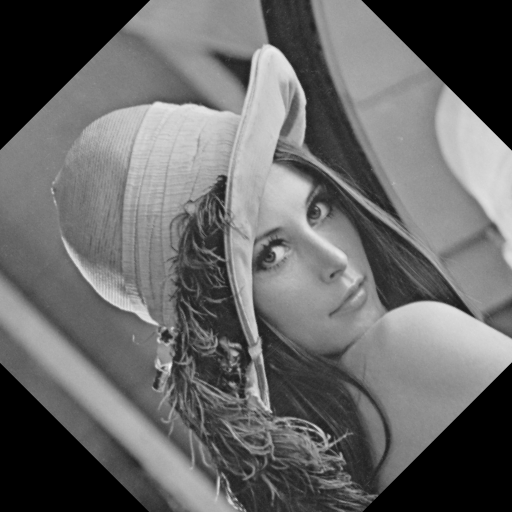

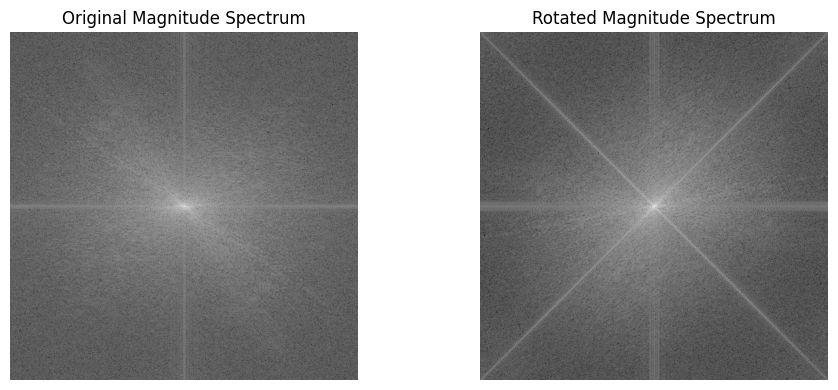

In [12]:
# Compute FFT and Magnitude Spectrum
fft = np.fft.fft2(gray_image)
fft_shifted = np.fft.fftshift(fft)
magnitude_spectrum = 20 * np.log(1 + np.abs(fft_shifted))

# Display original image and magnitude spectrum
print("ORIGINAL IMAGE")
cv2_imshow(gray_image)  # Original Image

# Step 2: Inverse FFT
ifft_shifted = np.fft.ifftshift(fft_shifted)
reconstructed_img = np.fft.ifft2(ifft_shifted).real

# Display reconstructed image
print("\n\nRECONSTRUCTED IMAGE")
cv2_imshow(reconstructed_img.astype(np.uint8))  # Convert to uint8 for display

# Step 3: Rotation Property
rows, cols = gray_image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_img = cv2.warpAffine(gray_image, rotation_matrix, (cols, rows))

# FFT for rotated image
rotated_fft = np.fft.fft2(rotated_img)
rotated_fft_shifted = np.fft.fftshift(rotated_fft)
rotated_magnitude_spectrum = 20 * np.log(1 + np.abs(rotated_fft_shifted))

# Display rotated image and its magnitude spectrum
print("\n\nROTATED IMAGE")
cv2_imshow(rotated_img)

# Plot magnitude spectrums side by side
print('\n\n')
plt.figure(figsize=(10, 4))

# Original Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.axis('off')

# Rotated Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.title("Rotated Magnitude Spectrum")
plt.axis('off')
plt.tight_layout()
plt.show()